# Mini Assignment 2

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


Here, we will use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. An example of the dataset, containing 70k greyscale images of clothing (10 articles) in greyscale, can be seen below: ![](https://www.tensorflow.org/images/fashion-mnist-sprite.png)

We will first load the data from tensorflow:

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Above, we loaded four NumPy arrays: two for training, and two for testing. The images are 28x28 NumPy arrays, and the labels are integer arrays that correspond to a class of clothing:

| Label |	Class|
|-------|--------|
| 0 | 	T-shirt/top|
| 1 | 	Trouser|
| 2 | 	Pullover|
| 3 | 	Dress|
| 4 | 	Coat|
| 5 | 	Sandal|
| 6 | 	Shirt|
| 7 | 	Sneaker|
| 8 | 	Bag|
| 9 | 	Ankle boot|

We will store the `class_names` below seeing as they are not included in the dataset:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocessing the data

The pixel ranges for the images are currently 0-255, and we need to scaled them between 0-1. 

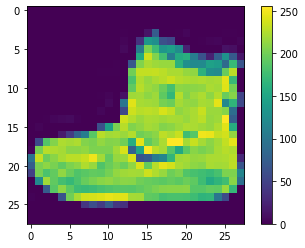

In [9]:
# Before

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

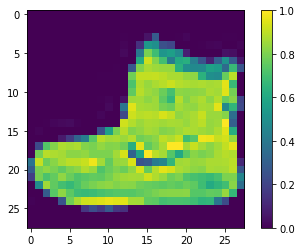

In [11]:
# After

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Note the scale change between the two images. Below we can do a quick preview of the first 25 images for s&g's:

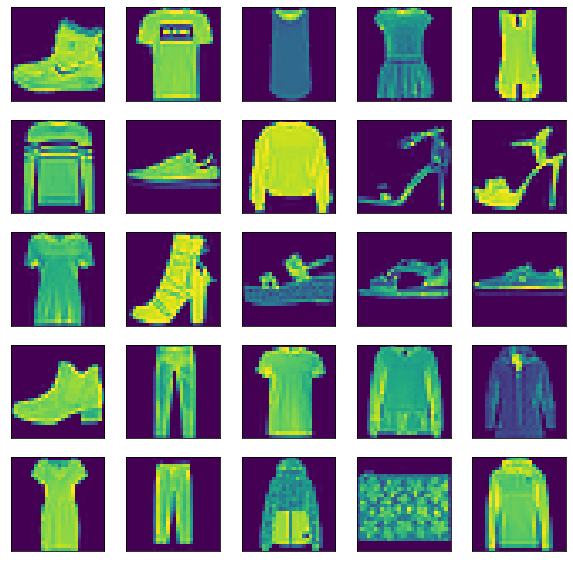

In [16]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]], color = 'white')
plt.show()

## Build the model: Setting up the layers

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # transforms 2d array into 1d array
    tf.keras.layers.Dense(128, activation='relu'), # First layer containing 128 nodes
    tf.keras.layers.Dense(10) # Last layer returning array of length 10 indicating a score for each category of clothing
])

## Compile the model

- Add a loss function 
- Add an optimizer 
- Add an `accuracy` metric that will tell us the fraction of correctly classified images during training and testing

In [20]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

# Train the model

This Requires 3 steps:

- Imput training data `train_images` and `train_labels`
- Let the model train
- have model make predictions
- Check predictions

## Feeding the model

In [21]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.6427 - accuracy: 0.7786
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3870 - accuracy: 0.8610
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3376 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3104 - accuracy: 0.8878
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2971 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2781 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2650 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2543 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2452 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.241

## Evaluate Accuracy

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

print('\nTest accuracy: ', test_acc)

313/313 - 0s - loss: 0.3404 - accuracy: 0.8860

Test accuracy:  0.8859999775886536


### Making Predictions

Using softmax, we can convert the model's logits output to more interpretable predictions:

In [29]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

In [30]:
predictions[0]

array([7.9520174e-10, 2.1919673e-11, 5.0169081e-11, 1.3252630e-10,
       1.5323932e-10, 9.6931373e-04, 1.7161246e-09, 1.1271126e-02,
       1.0104699e-08, 9.8775953e-01], dtype=float32)

These predicitions represent the model's confidence in its prediciton.

In [31]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


# Verify Predictions

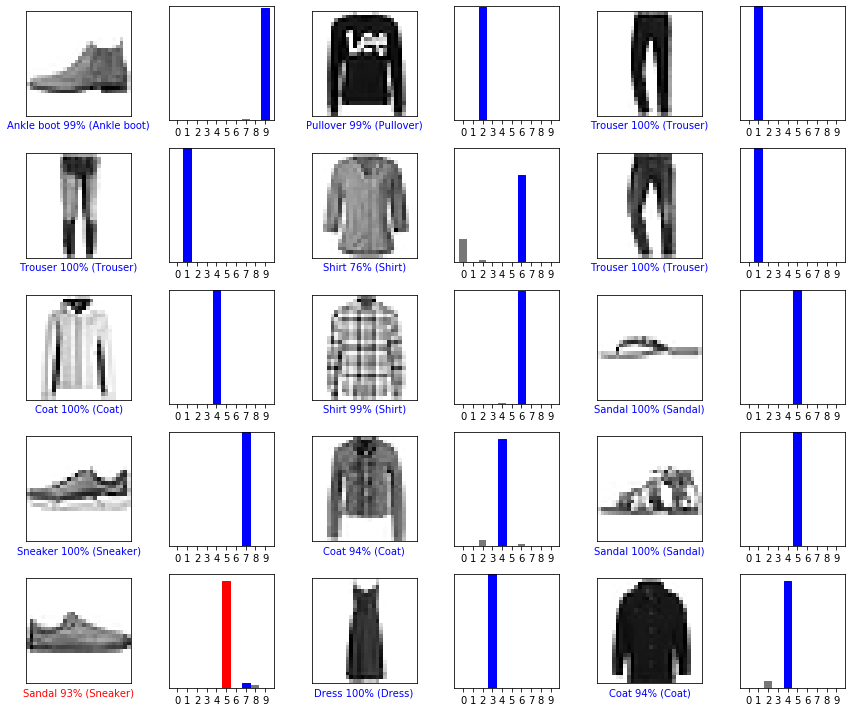

In [32]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


We can also use this trained model to make a prediciton about a single image, below:

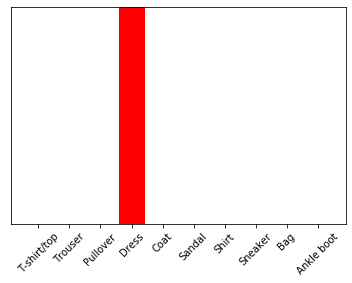

In [36]:
img = test_images[300]

img = (np.expand_dims(img, 0))

predicitons_single = probability_model.predict(img)

plot_value_array(1, predicitons_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)